In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
import pandas as pd
import numpy as np
import os
import sys

In [6]:
df = pd.read_csv("/Applications/Work Space/Python Work Space/python_forcesting/airline_passengers.csv", index_col="Month", parse_dates=True)
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [10]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
df.index.freq = "MS" # Calendar mounth begin...

In [12]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [14]:
ses = SimpleExpSmoothing(df["Passengers"], initialization_method="legacy-heuristic")

alpha = 0.2

In [17]:
res = ses.fit(smoothing_level=alpha, optimized=False)

In [22]:
res.predict(start=df.index[0], end=df.index[-1])

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    113.200000
1949-04-01    116.960000
1949-05-01    119.368000
                 ...    
1960-08-01    488.767616
1960-09-01    512.214093
1960-10-01    511.371274
1960-11-01    501.297019
1960-12-01    479.037615
Freq: MS, Length: 144, dtype: float64

In [18]:
df["SES"] = res.predict(start=df.index[0], end=df.index[-1])

<Axes: xlabel='Month'>

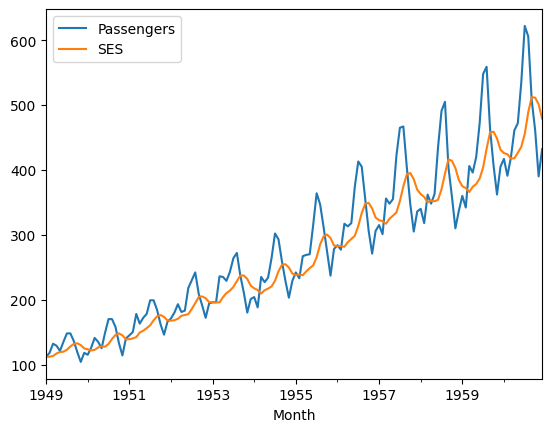

In [20]:
df.plot()

In [21]:
np.allclose(df["SES"], res.fittedvalues)

True

### df["SES-1"] burda df["EWMA"] ile aynı olmaktadır...

<Axes: xlabel='Month'>

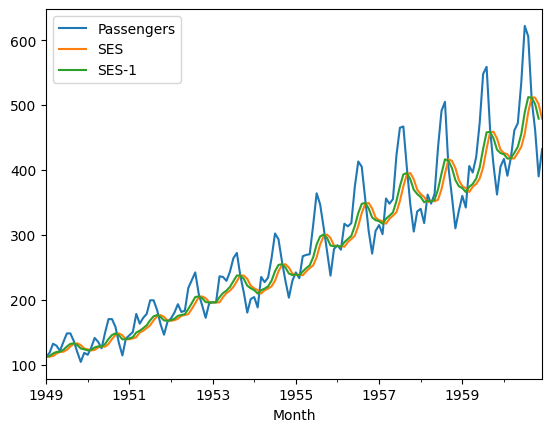

In [25]:
df["SES-1"] = df["SES"].shift(-1)
df.plot()

In [33]:
N_test = 12
train = df.iloc[:-N_test]
test = df.iloc[-N_test:]

In [34]:
ses = SimpleExpSmoothing(train["Passengers"], initialization_method="legacy-heuristic")
res = ses.fit()

In [35]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]


<Axes: xlabel='Month'>

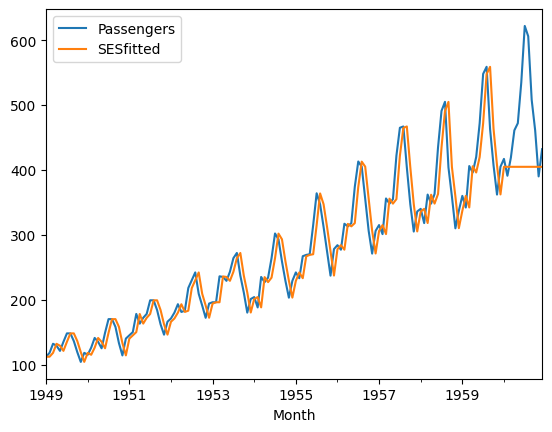

In [36]:
df.loc[train_idx, "SESfitted"] = res.fittedvalues
df.loc[test_idx, "SESfitted"] = res.forecast(N_test)
df[["Passengers", "SESfitted"]].plot()

In [37]:
res.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 112.0,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}